In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
ipl=pd.read_csv(r'C:\Users\Saurav Kumar\projects\WebScraping\IPL2020\ipl.csv')
df=ipl.copy()
df.head()

,Team,Runs,Wickets,Fours,Sixes,PowerPlay Runs,PowerPlay Wickets,Mid Over Runs,Last Four Over,Extra Receive,...,keeper catch,run out,lbw,hit wicket,Innings,Super Over,Against,Ground,Result,DOM
0,Kings XI Punjab,126,7,7,2,47,1,47,32,7,...,NaN,1.0,NaN,NaN,1,False,Sunrisers Hyderabad,Dubai,Won,2020-10-24
1,Sunrisers Hyderabad,114,10,12,2,52,0,47,15,4,...,2.0,1.0,NaN,NaN,2,False,Kings XI Punjab,Dubai,Lost,2020-10-24
2,Chennai Super Kings,114,9,9,3,24,5,49,41,12,...,3.0,NaN,1.0,NaN,1,False,Mumbai Indians,Sharjah,Lost,2020-10-23
3,Mumbai Indians,116,0,11,7,52,0,37,27,2,...,NaN,NaN,NaN,NaN,2,False,Chennai Super Kings,Sharjah,Won,2020-10-23
4,Kolkata Knight Riders,84,8,6,2,17,4,41,26,3,...,2.0,1.0,1.0,NaN,1,False,Royal Challengers Bangalore,Abu Dhabi,Lost,2020-10-21


Filling all Nan values in the data with 0.

In [5]:
df.fillna(0.0,inplace=True)

In [6]:
df.columns

Index(['Team', 'Runs', 'Wickets', 'Fours', 'Sixes', 'PowerPlay Runs',
       'PowerPlay Wickets', 'Mid Over Runs', 'Last Four Over', 'Extra Receive',
       'Extra Given', 'Wickets Taken', 'Overs', 'Run Rate', 'hundred',
       'seventies', 'fifties', 'thirties', 'Caught', 'bowled', 'keeper catch',
       'run out', 'lbw', 'hit wicket', 'Innings', 'Super Over', 'Against',
       'Ground', 'Result', 'DOM'],
      dtype='object')

Mapping the 'Innings' col values to "first" and "second".

In [7]:
def inning(val):
    if val==1:
        return 'first'
    else:
        return 'second'
    
    
df['innings']=df['Innings'].apply(inning)
df.drop('Innings',axis=1,inplace=True)
df.head()

,Team,Runs,Wickets,Fours,Sixes,PowerPlay Runs,PowerPlay Wickets,Mid Over Runs,Last Four Over,Extra Receive,...,keeper catch,run out,lbw,hit wicket,Super Over,Against,Ground,Result,DOM,innings
0,Kings XI Punjab,126,7,7,2,47,1,47,32,7,...,0.0,1.0,0.0,0.0,False,Sunrisers Hyderabad,Dubai,Won,2020-10-24,first
1,Sunrisers Hyderabad,114,10,12,2,52,0,47,15,4,...,2.0,1.0,0.0,0.0,False,Kings XI Punjab,Dubai,Lost,2020-10-24,second
2,Chennai Super Kings,114,9,9,3,24,5,49,41,12,...,3.0,0.0,1.0,0.0,False,Mumbai Indians,Sharjah,Lost,2020-10-23,first
3,Mumbai Indians,116,0,11,7,52,0,37,27,2,...,0.0,0.0,0.0,0.0,False,Chennai Super Kings,Sharjah,Won,2020-10-23,second
4,Kolkata Knight Riders,84,8,6,2,17,4,41,26,3,...,2.0,1.0,1.0,0.0,False,Royal Challengers Bangalore,Abu Dhabi,Lost,2020-10-21,first


Which team took most wickets in first Innings.

In [41]:
max_val=max(df[df['innings']=='second'].groupby('Team')['Wickets Taken'].sum())
wicket_taken_teams=(df[df['innings']=='second'].groupby('Team')['Wickets Taken'].sum()).reset_index()

wicket_taken_teams[(wicket_taken_teams['Wickets Taken']==max_val)]


,Team,Wickets Taken
0,Chennai Super Kings,59
7,Sunrisers Hyderabad,59


Which team lost less wickets on an average.

In [45]:
min_value=min(df.groupby('Team')['Wickets'].mean())
min_wickets=df.groupby('Team')['Wickets'].mean().reset_index()
min_wickets[min_wickets['Wickets']==min_value]

,Team,Wickets
4,Mumbai Indians,4.625


In [47]:
'''Avg PowerPlay runs for teams that won the match'''

df[df['Result']=='Won']['PowerPlay Runs'].mean()

49.53333333333333

In [49]:
'''Average PowerPlay Runs for matches that resulted in loss'''

df[df['Result']=='Lost']['PowerPlay Runs'].mean()

43.03333333333333

In [54]:
'''Average Last 4 over runs that resulted in Win'''

df[df['Result']=='Won']['Last Four Over'].mean()

43.9

In [55]:
'''Average Last 4 over runs that resulted in Loss'''

df[df['Result']=='Lost']['Last Four Over'].mean()

37.2

Which Inning has most wins

In [63]:
first=df[(df['Result']=='Won') & (df['innings']=='first')]['innings'].count()
second=df[(df['Result']=='Won') & (df['innings']=='second')]['innings'].count()

if first>second:
    print('First Inning has most Wins')
elif first==second:
    print('Both Inning have equal wins')
else:
    print('Second Inning has most wins')

Second Inning has most wins


Ground having best first inning average

In [76]:
((df[df['innings']=='first'].groupby('Ground')['Runs'].mean()).reset_index()).max()

Ground    Sharjah
Runs      177.917
dtype: object

Which Ground has best IInd inning win ratio.

In [77]:
df[df['Result']=='Won'].groupby(['Ground','innings'])['Result'].count()

Ground     innings
Abu Dhabi  first       8
           second     14
Dubai      first      14
           second     12
Sharjah    first       5
           second      7
Name: Result, dtype: int64

In [88]:
second_inn=df[(df['Result']=='Won') & (df['innings']=='second')]['Ground'].value_counts().to_dict()
first_inn=df[(df['Result']=='Won') & (df['innings']=='first')]['Ground'].value_counts().to_dict()

for x in df['Ground'].unique():
    tot_match=second_inn.get(x)+first_inn.get(x)
    print(x,round(second_inn.get(x)/tot_match,2))

Dubai 0.46
Sharjah 0.58
Abu Dhabi 0.64


Which Team won most of their matches in second Inning

In [20]:
df.groupby(['Team','innings'])['Result'].value_counts()

Team                         innings  Result
Chennai Super Kings          first    Lost      3
                                      Won       1
                             second   Lost      5
                                      Won       5
Delhi Capitals               first    Won       6
                                      Lost      5
                             second   Lost      4
                                      Won       2
Kings XI Punjab              first    Lost      4
                                      Won       2
                             second   Won       5
                                      Lost      3
Kolkata Knight Riders        first    Lost      5
                                      Won       5
                             second   Lost      3
                                      Won       1
Mumbai Indians               first    Won       5
                                      Lost      4
                             second   Won       7
Rajas

Inference:

1. Mumbai Indians had won all the matches they played in second Innings.
2. Second best win ratio in second innings comes from Royal Challengers Bangalore.
3. Chennai Super kings and Rajasthan Royal had Worst first inning win ratio. They lost 75% of the matches they played in first Innings.
4. Same can be said about Kolkata Knight Riders in second Inning having lost ratio as high as 75%. 

Win and loss ration for each Team in the venues they played

In [8]:
df.groupby(['Team','Ground'])['Result'].value_counts('percentage')

Team                         Ground     Result
Chennai Super Kings          Abu Dhabi  Lost      0.500000
                                        Won       0.500000
                             Dubai      Won       0.571429
                                        Lost      0.428571
                             Sharjah    Lost      1.000000
Delhi Capitals               Abu Dhabi  Lost      0.600000
                                        Won       0.400000
                             Dubai      Lost      0.666667
                                        Won       0.333333
                             Sharjah    Won       1.000000
Kings XI Punjab              Abu Dhabi  Lost      1.000000
                             Dubai      Won       0.714286
                                        Lost      0.285714
                             Sharjah    Won       0.666667
                                        Lost      0.333333
Kolkata Knight Riders        Abu Dhabi  Lost      0.500000
         

Win and loss numbers for teams in "Dubai"

In [40]:
df[df['Ground']=='Dubai'].groupby(['Team','Ground'])['Result'].value_counts('won')

Team                         Ground  Result
Chennai Super Kings          Dubai   Won       0.571429
                                     Lost      0.428571
Delhi Capitals               Dubai   Lost      0.666667
                                     Won       0.333333
Kings XI Punjab              Dubai   Won       0.714286
                                     Lost      0.285714
Kolkata Knight Riders        Dubai   Won       0.666667
                                     Lost      0.333333
Mumbai Indians               Dubai   Won       0.800000
                                     Lost      0.200000
Rajasthan Royals             Dubai   Lost      0.833333
                                     Won       0.166667
Royal Challengers Bangalore  Dubai   Lost      0.571429
                                     Won       0.428571
Sunrisers Hyderabad          Dubai   Lost      0.500000
                                     Won       0.500000
Name: Result, dtype: float64

Inference
1. Mumbai Indians won 80% of the matches they played in Dubai.
2. Rajasthan Royals lost 83% of the match in Dubai.(Worst Team at Dubai)

Which ground saw most fifties

In [32]:
df.groupby('Ground')['fifties'].count()

Ground
Abu Dhabi    44
Dubai        52
Sharjah      24
Name: fifties, dtype: int64

In [11]:
df1=df.copy()

See the scatter plot of last four over runs w.r.t. teams playing.

<AxesSubplot:xlabel='Team', ylabel='Last Four Over'>

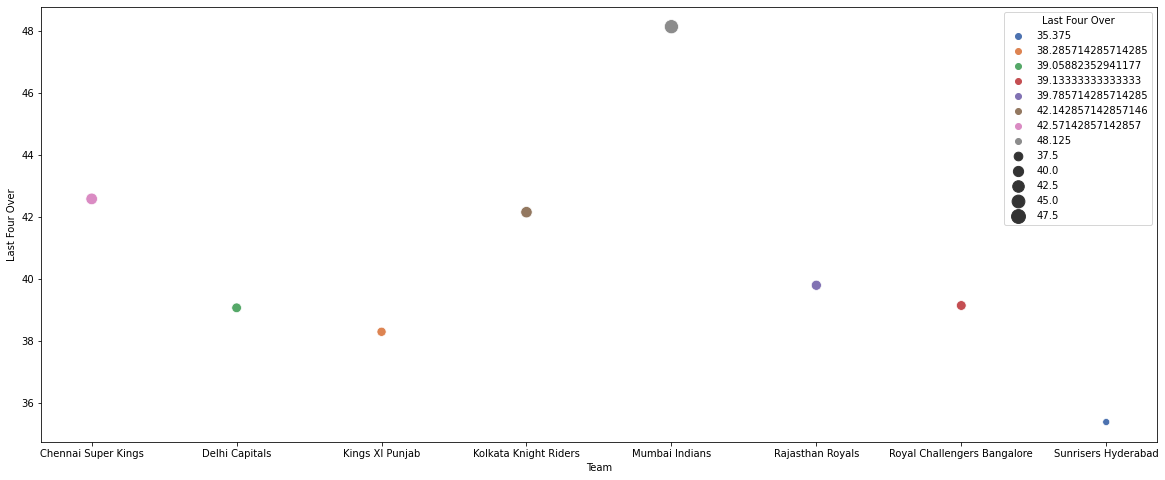

In [12]:
plt.figure(figsize=(20,8))
y=(df1.groupby('Team')['Last Four Over'].mean()).reset_index()
sns.scatterplot(data=y,x='Team',y='Last Four Over',size='Last Four Over',hue='Last Four Over',palette='deep',sizes=(50,200))

In [83]:
df['Team'].unique()

array(['Kings XI Punjab', 'Sunrisers Hyderabad', 'Chennai Super Kings',
       'Mumbai Indians', 'Kolkata Knight Riders',
       'Royal Challengers Bangalore', 'Rajasthan Royals',
       'Delhi Capitals'], dtype=object)

<Figure size 1440x576 with 0 Axes>

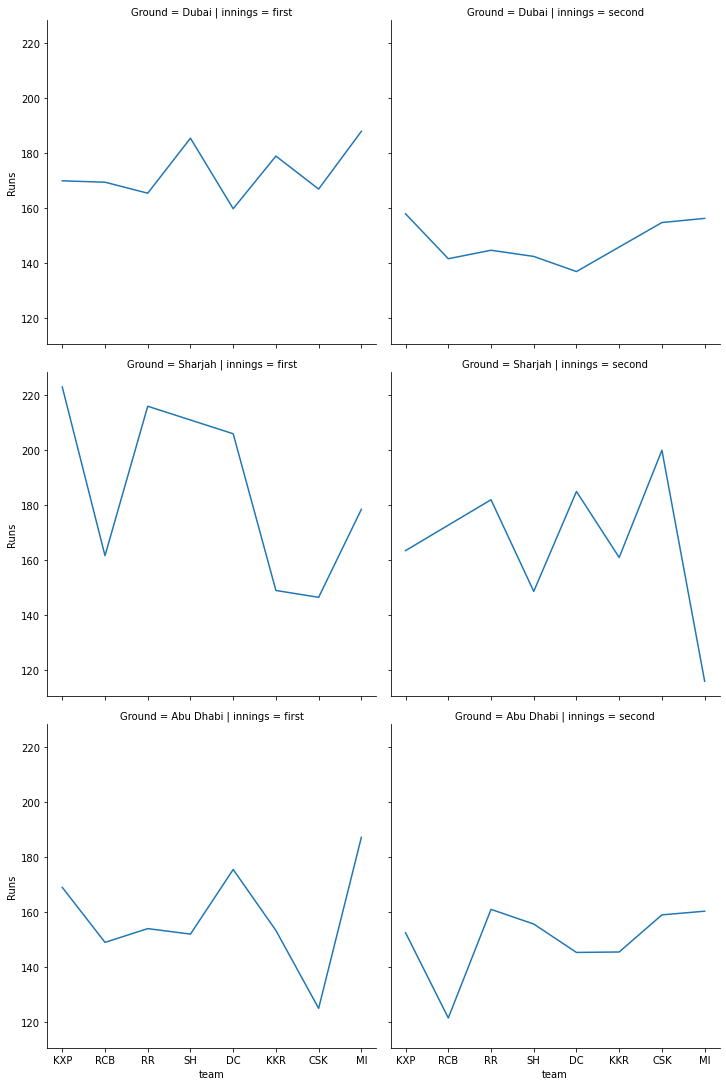

In [13]:
# fig,ax=plt.subplots()
def team(val):
    x=val.split(' ')
    new_name=''
    for y in x:
        new_name+=y[0:1]
    return new_name

df1['team']=df1['Team'].apply(team)
plt.figure(figsize=(20,8))
sns.relplot(x='team',y='Runs',data=df1,kind='line',ci=None,col='innings',row='Ground')

Inference:
1. MI has worst second Inning average runs at Sharjah which goes below 120.
2. RCB has average close to 120 in Abu Dhabi which is lowest for the second Inning.
3. Same is for CSK in first inning at Abu Dhabi
4. At Dubai, you could see a different range all together for both first and second innings. First inning averages from above 160 to 190 and second inning averages from 140 to 160.

<AxesSubplot:xlabel='Runs', ylabel='Density'>

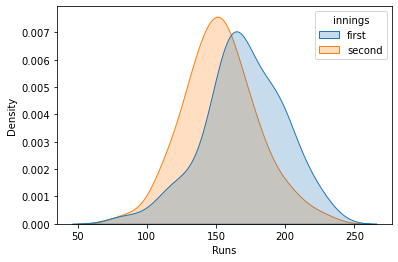

In [20]:
sns.kdeplot(data=df,x='Runs',hue='innings',fill=True)

In [16]:
sns.kdeplot(data=df,x='Runs',hue='innings',fill=True)

Index(['Team', 'Runs', 'Wickets', 'Fours', 'Sixes', 'PowerPlay Runs',
       'PowerPlay Wickets', 'Mid Over Runs', 'Last Four Over', 'Extra Receive',
       'Extra Given', 'Wickets Taken', 'Overs', 'Run Rate', 'hundred',
       'seventies', 'fifties', 'thirties', 'Caught', 'bowled', 'keeper catch',
       'run out', 'lbw', 'hit wicket', 'Super Over', 'Against', 'Ground',
       'Result', 'DOM', 'innings', 'team'],
      dtype='object')

<AxesSubplot:xlabel='thirties', ylabel='Density'>

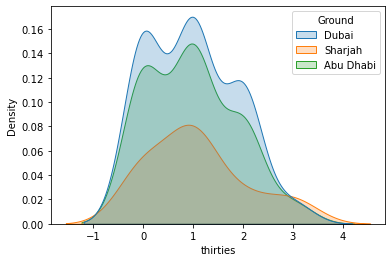

In [23]:
sns.kdeplot(data=df,x='thirties',hue='Ground',fill=True)

<AxesSubplot:xlabel='fifties', ylabel='Density'>

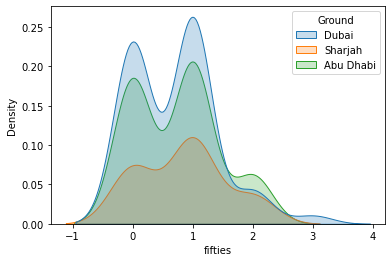

In [33]:
sns.kdeplot(data=df,x='fifties',hue='Ground',fill=True)

<AxesSubplot:xlabel='Run Rate', ylabel='Density'>

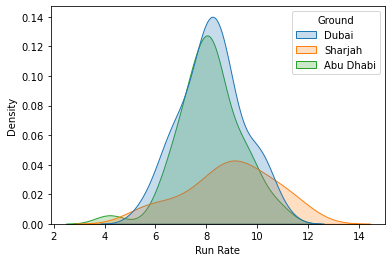

In [34]:
sns.kdeplot(data=df,x='Run Rate',hue='Ground',fill=True)

KDE plots helps us realize the distribution of the features which reveals important information about them.
1. In the above figure we can clearly say by looking at the plot that "Run Rate" in Sharjah is slightly higher than the other two grounds.
2. Y-axis displays the density of the categorical value in a column. 
3. This means 'Sharjah' has less number of values in 'Ground' column w.r.t other two.